In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#데이터 로딩, 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = \
train_test_split(
     iris_data.data
    ,iris_data.target
    ,test_size=0.2
    ,random_state=11
)

In [3]:
#모델 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#학습데이터와 답으로 모델생성
dt_clf.fit(
     X_train #학습데이터
    ,y_train #학습데이터의 답
)

DecisionTreeClassifier(random_state=156)

In [4]:
#시각화에 필요한 dot파일 생성
from sklearn.tree import export_graphviz

export_graphviz(
     dt_clf #학습한 모델
    ,out_file='tree.dot' #저장할 dot파일 이름
    ,class_names=iris_data.target_names 
    ,feature_names=iris_data.feature_names
    ,impurity=True
    ,filled=True
)

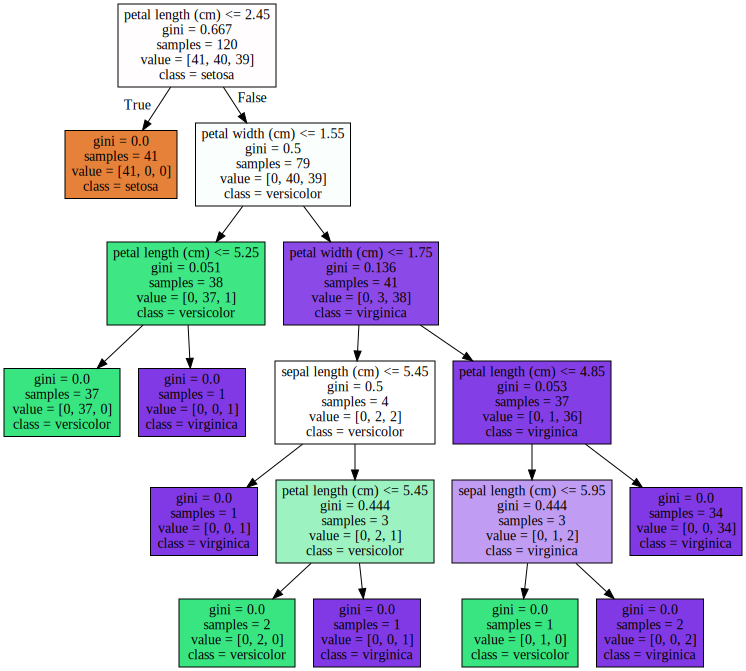

In [5]:
#그래프 시각화
import graphviz

# f = open('tree.dot')
# #처리코드
# f.close()

with open('tree.dot') as f:
    dot_graph = f.read()#전체 읽는다
    
graphviz.Source(dot_graph)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#피처의 중요도 추출
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [16]:
#피처별 중요도 출력
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name,value))

sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot:>

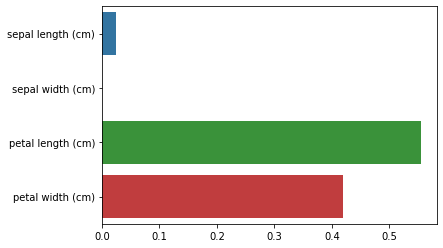

In [19]:
sns.barplot(
     x=dt_clf.feature_importances_
    ,y=iris_data.feature_names
)

### 결정트리 과적합 예제

In [29]:
#임의의 데이터로 예제처리
#피처:2개, 답 :3개 임의의 데이터 생성
from sklearn.datasets import make_classification

#데이터 생성
X_features, y_labels=make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_classes=3, n_clusters_per_class=1, random_state=0
)

In [30]:
#그래프의 형태로 2개의 피처로 2차원좌표 시각화, 각클래스값은 다른색

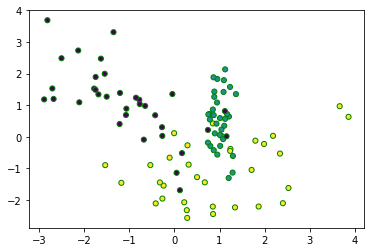

In [37]:
plt.scatter(
      X_features[:,0]
    , X_features[:,1]
    , marker='o'
    , c=y_labels
    , s=26
    , edgecolors='g'
)